<a href="https://colab.research.google.com/github/Mazgaliev/ML/blob/main/Forest_Fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
from xgboost import XGBRegressor,XGBClassifier
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV,train_test_split
import numpy as np
from math import sqrt
from scipy.stats import uniform, randint


In [ ]:
with pd.option_context('display.precision', 10):
    df = pd.read_csv("forestfires.csv", float_precision=None)

In [ ]:
df['area']=np.log(df['area']+1)

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df.describe()
#general data description

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,1.111026
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,1.398436
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.418710
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,2.024193
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,6.995620


#Missing values and visualizations

In [ ]:
import missingno as msno

<Axes: >

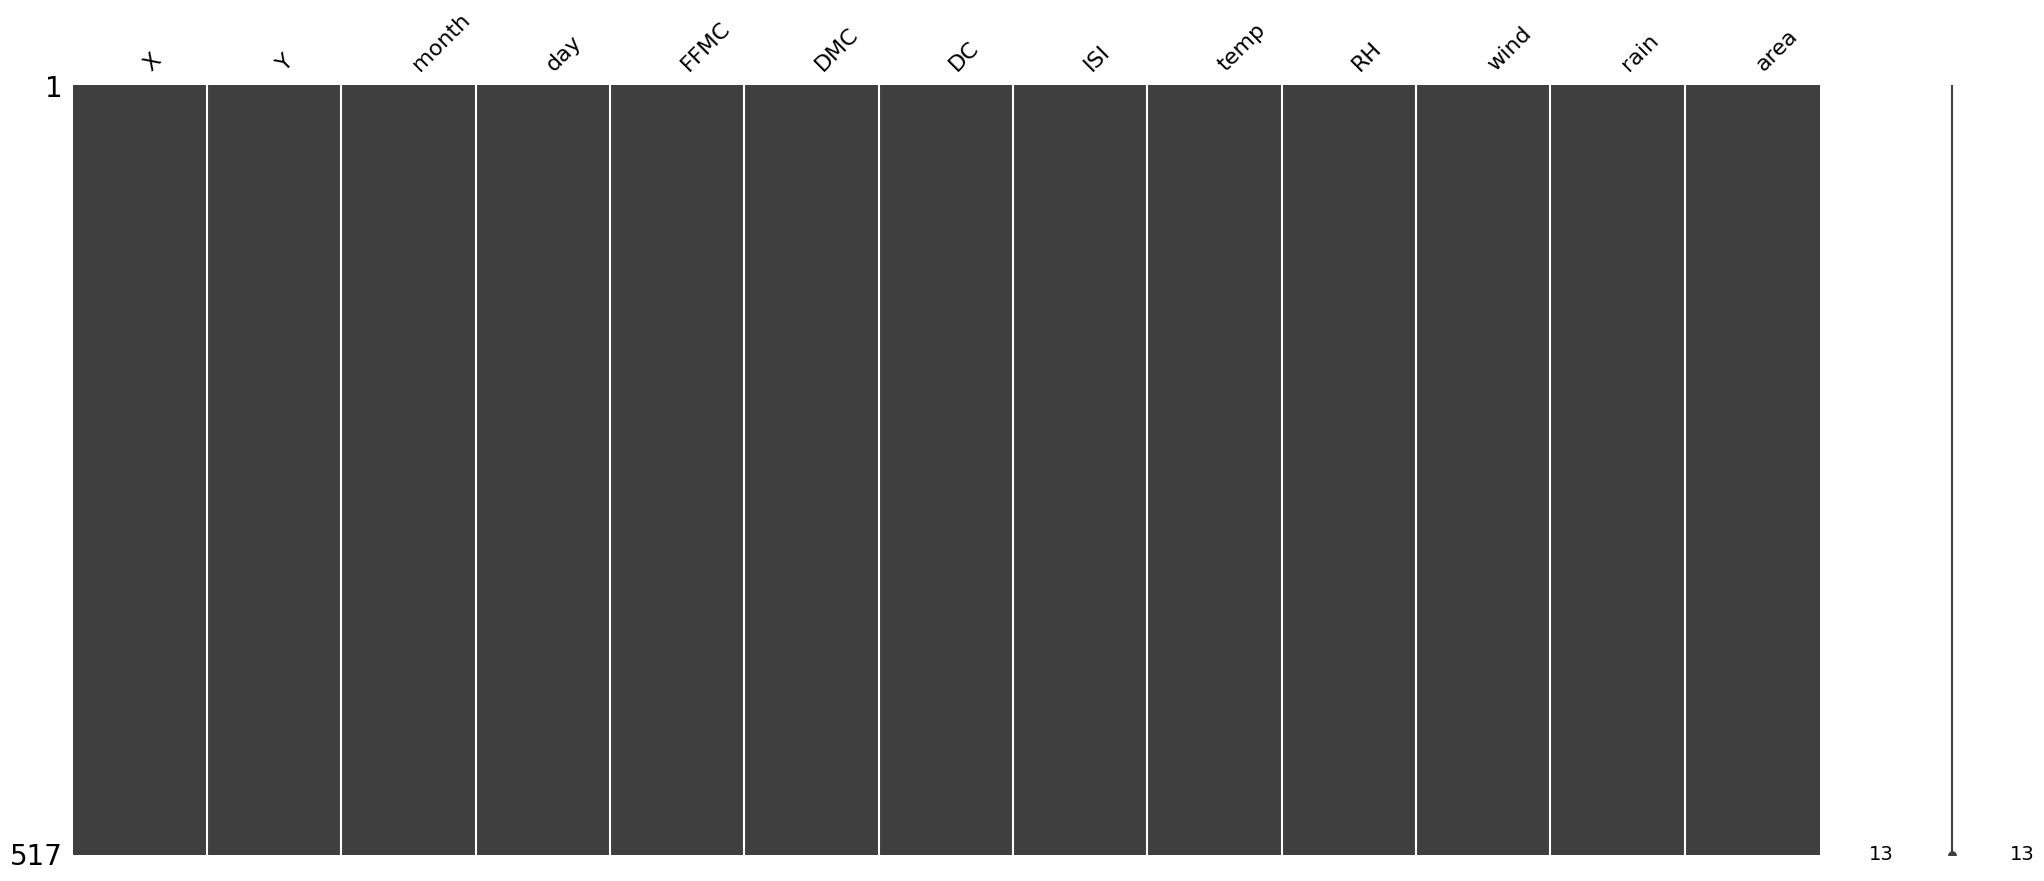

In [ ]:
msno.matrix(df)

No missin values

<Axes: >

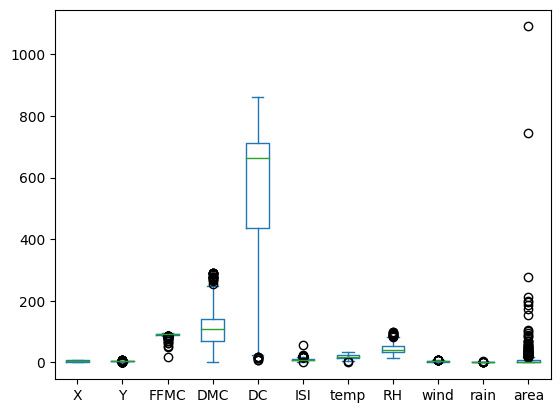

In [ ]:
df.plot.box()

Tuka mozhe da vidime deka vo area ogromen broj od vrednostite se 0.00 pa vo toj slucaj ostanatite se kako outliers. Vo ovoj slucaj bi ni bilo potrebno da gi predvidime tie shto se poveke od 0

In [ ]:
corr_mat=df.corr(method='spearman')

<ipython-input-12-89e47e82c161>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=df.corr(method='spearman')


In [ ]:
print(corr_mat)

             X         Y      FFMC       DMC        DC       ISI      temp  \
X     1.000000  0.492705 -0.059573 -0.079860 -0.072543 -0.010799 -0.051083   
Y     0.492705  1.000000 -0.009635  0.004525 -0.105404 -0.013202 -0.040541   
FFMC -0.059573 -0.009635  1.000000  0.511437  0.263049  0.783566  0.594765   
DMC  -0.079860  0.004525  0.511437  1.000000  0.558791  0.425159  0.502963   
DC   -0.072543 -0.105404  0.263049  0.558791  1.000000  0.103832  0.308746   
ISI  -0.010799 -0.013202  0.783566  0.425159  0.103832  1.000000  0.416404   
temp -0.051083 -0.040541  0.594765  0.502963  0.308746  0.416404  1.000000   
RH    0.065841  0.050028 -0.319549  0.034604  0.025869 -0.177498 -0.517636   
wind  0.026846 -0.008629 -0.035399 -0.110436 -0.205825  0.135586 -0.179908   
rain  0.109536  0.079107  0.097398  0.120555  0.008048  0.117454  0.026024   
area  0.060499  0.046018  0.025300  0.071920  0.061633  0.012496  0.078696   

            RH      wind      rain      area  
X     0.065841  

In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc=LabelEncoder()

<Axes: >

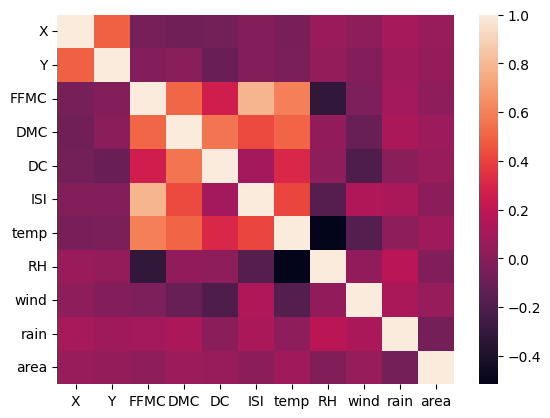

In [ ]:
sns.heatmap(corr_mat)

In [ ]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [ ]:
df['month']=enc.fit_transform(df['month'])
df['day']=enc.fit_transform(df['day'])

array([[<Axes: xlabel='FFMC', ylabel='FFMC'>,
        <Axes: xlabel='DMC', ylabel='FFMC'>,
        <Axes: xlabel='DC', ylabel='FFMC'>,
        <Axes: xlabel='ISI', ylabel='FFMC'>,
        <Axes: xlabel='temp', ylabel='FFMC'>,
        <Axes: xlabel='RH', ylabel='FFMC'>,
        <Axes: xlabel='wind', ylabel='FFMC'>,
        <Axes: xlabel='rain', ylabel='FFMC'>,
        <Axes: xlabel='area', ylabel='FFMC'>],
       [<Axes: xlabel='FFMC', ylabel='DMC'>,
        <Axes: xlabel='DMC', ylabel='DMC'>,
        <Axes: xlabel='DC', ylabel='DMC'>,
        <Axes: xlabel='ISI', ylabel='DMC'>,
        <Axes: xlabel='temp', ylabel='DMC'>,
        <Axes: xlabel='RH', ylabel='DMC'>,
        <Axes: xlabel='wind', ylabel='DMC'>,
        <Axes: xlabel='rain', ylabel='DMC'>,
        <Axes: xlabel='area', ylabel='DMC'>],
       [<Axes: xlabel='FFMC', ylabel='DC'>,
        <Axes: xlabel='DMC', ylabel='DC'>,
        <Axes: xlabel='DC', ylabel='DC'>,
        <Axes: xlabel='ISI', ylabel='DC'>,
        <Axes: xlab

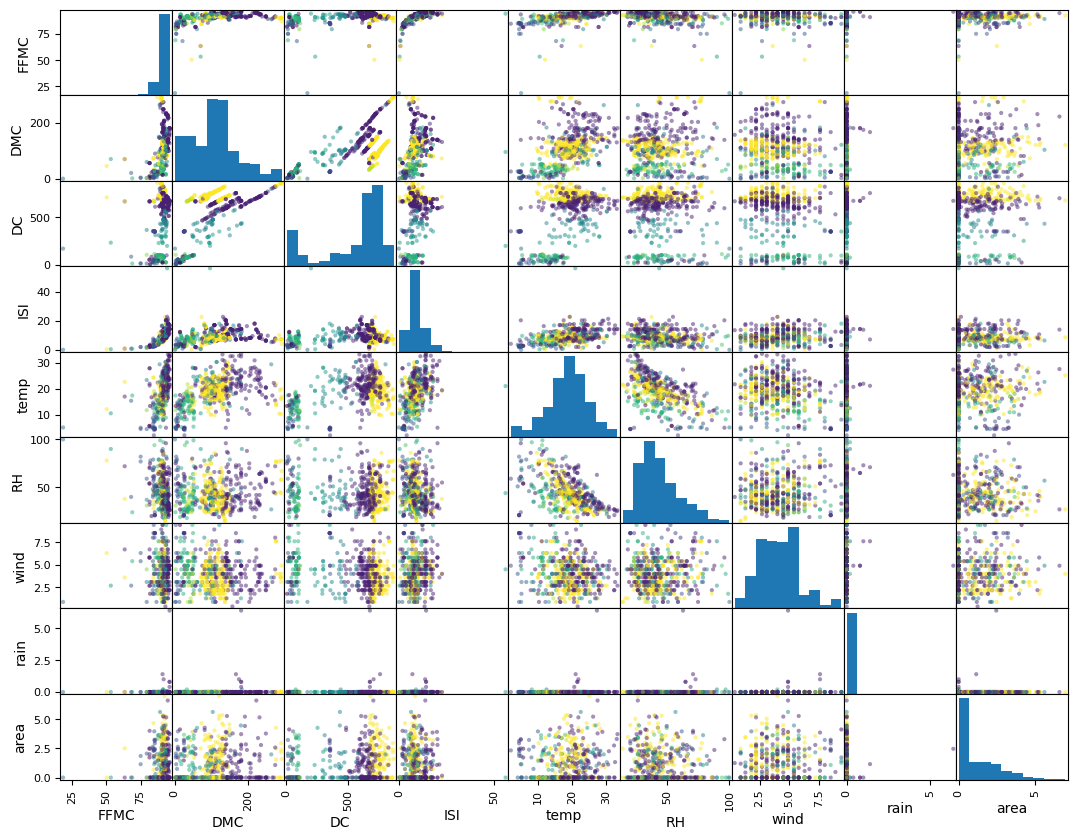

In [ ]:
scatter_matrix(df.drop(columns=['X','Y','month','day']),c=df['month'],figsize=[13,10])

#Coefficient_Analysis

In [ ]:
!pip install pingouin
import pingouin as pg


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df['month']=encoder.fit_transform(df['month'])
df['day']=encoder.fit_transform(df['day'])

In [ ]:
df=np.log(df+1)

In [ ]:
lm=pg.linear_regression(df.drop(columns=['area','day','rain','Y','X','month','DMC']), df['area'],alpha=0.05,relimp=True)
lm


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,-2.976827,4.179032,-0.712325,0.476590,0.018948,0.007406,-11.187062,5.233409,NaN,NaN
1,FFMC,1.063280,0.923937,1.150814,0.250348,0.018948,0.007406,-0.751912,2.878471,0.002279,12.029851
2,DC,0.175696,0.080502,2.182497,0.029528,0.018948,0.007406,0.017539,0.333854,0.006509,34.354392
3,ISI,-0.201988,0.183397,-1.101368,0.271256,0.018948,0.007406,-0.562294,0.158319,0.001109,5.850571
4,temp,-0.244357,0.249946,-0.977640,0.328716,0.018948,0.007406,-0.735406,0.246693,0.001025,5.407480
5,RH,-0.284342,0.203626,-1.396392,0.163204,0.018948,0.007406,-0.684392,0.115708,0.002855,15.068111
6,wind,0.293854,0.172439,1.704104,0.088971,0.018948,0.007406,-0.044924,0.632632,0.005171,27.289595


In [ ]:
lr=LinearRegression()

##Take only the values >0

In [ ]:
!pip install pingouin
import pingouin as pg


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("forestfires.csv")

In [ ]:
new_df=df[df['area']>0]

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

new_df['month']=encoder.fit_transform(new_df['month'])
new_df['day']=encoder.fit_transform(new_df['day'])

<ipython-input-75-4c747661cdf7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['month']=encoder.fit_transform(new_df['month'])
<ipython-input-75-4c747661cdf7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['day']=encoder.fit_transform(new_df['day'])


In [ ]:
lm=pg.linear_regression(new_df.drop(columns=['area','day','Y','FFMC','rain','DC','RH','DMC']), new_df['area'],alpha=0.05,relimp=True)
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%],relimp,relimp_perc
0,Intercept,-43.483413,30.250713,-1.437434,0.151779,0.027361,0.00894,-103.046780,16.079954,NaN,NaN
1,X,2.931010,2.215261,1.323099,0.186947,0.027361,0.00894,-1.430817,7.292837,0.005755,21.031999
2,month,1.111837,1.239963,0.896670,0.370712,0.027361,0.00894,-1.329638,3.553313,0.002636,9.635589
3,ISI,-1.335419,1.520511,-0.878270,0.380596,0.027361,0.00894,-4.329290,1.658453,0.001558,5.692981
4,temp,2.417662,1.049898,2.302759,0.022070,0.027361,0.00894,0.350423,4.484900,0.015785,57.692313
5,wind,3.210957,3.096345,1.037015,0.300678,0.027361,0.00894,-2.885716,9.307631,0.001627,5.947117


In [ ]:
from sklearn.linear_model import LinearRegression,LassoCV
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
lr=LinearRegression()
lasso=LassoCV()

In [ ]:
Y=scaler.fit_transform(Y.array.reshape(-1, 1) )

In [ ]:
Y=new_df['area']
X=new_df.drop(columns=['area','day'])

In [ ]:
X=np.log(X+1)

In [ ]:
X.head()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain
138,2.302585,2.302585,1.791759,4.463607,3.897924,5.750666,1.589235,2.944439,3.761200,1.308333,0.0
139,0.693147,1.609438,2.484907,4.521789,4.871373,6.541895,2.079442,3.122365,3.663562,1.163151,0.0
140,1.098612,1.791759,2.484907,4.520701,4.848116,6.533062,2.079442,3.131137,3.688879,1.029619,0.0
141,0.693147,1.098612,0.693147,4.569543,4.614130,6.242807,2.653242,3.190476,3.465736,1.704748,0.0
142,2.197225,1.945910,0.693147,4.511958,4.691348,6.274385,2.602690,3.100092,3.951244,2.292535,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [ ]:
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(sqrt(mean_squared_error(y_test,y_pred)))

-1.9687151816985207
7.042314174269533
2.6537358900745063


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(sqrt(mean_squared_error(y_test,y_pred)))

-1.9064138061445353
6.894524361745551
2.6257426305229443


In [ ]:
xgb=XGBRegressor(n_estimators=250,max_depth=5)

In [ ]:
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(sqrt(mean_squared_error(y_test,y_pred)))

-2.0395983874216
7.210461596244754
2.685230268756248


In [ ]:
xgb.feature_importances_

array([2.2029735e-02, 8.0647193e-02, 1.2052767e-02, 1.2125519e-02,
       4.4927159e-01, 3.4183162e-01, 1.6091246e-02, 3.1214727e-02,
       1.0970940e-02, 2.3702623e-02, 6.2046434e-05], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import keras.metrics as metrics

In [ ]:
X=new_df.drop(columns=['area','day'])
Y=new_df['area']

In [ ]:
Y=np.log(Y)

In [ ]:
X_train,X_test,y_trian,y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
# y_train=scaler.fit_transform(y_train)
# y_test=scaler.transform(y_test.array.reshape(-1, 1))

In [ ]:
model = Sequential()

model.add(Dense(11,input_dim=11,activation='relu'))
model.add(Dense(32,activation='relu'))
# model.add(Dense(128,activation='relu'))
# model.add(Dense(64,activation='relu'))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=[metrics.mean_squared_error])

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=8,epochs=500)

Epoch 1/500
27/27 [==============================] - 1s 9ms/step - loss: 2.2652 - mean_squared_error: 2.2652 - val_loss: 3.7037 - val_mean_squared_error: 3.7037
Epoch 2/500
27/27 [==============================] - 0s 4ms/step - loss: 1.4059 - mean_squared_error: 1.4059 - val_loss: 4.6503 - val_mean_squared_error: 4.6503
Epoch 3/500
27/27 [==============================] - 0s 4ms/step - loss: 1.1902 - mean_squared_error: 1.1902 - val_loss: 5.2116 - val_mean_squared_error: 5.2116
Epoch 4/500
27/27 [==============================] - 0s 4ms/step - loss: 1.1012 - mean_squared_error: 1.1012 - val_loss: 5.4853 - val_mean_squared_error: 5.4853
Epoch 5/500
27/27 [==============================] - 0s 4ms/step - loss: 1.0669 - mean_squared_error: 1.0669 - val_loss: 5.5070 - val_mean_squared_error: 5.5070
Epoch 6/500
27/27 [==============================] - 0s 4ms/step - loss: 1.0425 - mean_squared_error: 1.0425 - val_loss: 5.4998 - val_mean_squared_error: 5.4998
Epoch 7/500
27/27 [===============

In [ ]:
y_pred=model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error,explained_variance_score
from math import sqrt

print(explained_variance_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

print(mean_squared_error(y_test,y_pred))
print(sqrt(mean_squared_error(y_test,y_pred)))

2/2 [==============================] - 0s 5ms/step
-0.39104278478174503
-1.8541641537880071
5.747162578661443
2.3973240454017564


#Models

##Linear_Regr

In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [ ]:
X=df.drop(columns=['area'])
Y=df['area']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(sqrt(mean_squared_error(y_test,y_pred)))

-0.012705333964482701
0.3747025238554488
0.6121294992527715


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
y_train=scaler.fit_transform(y_train.array.reshape(-1, 1) )
y_test=scaler.transform(y_test.array.reshape(-1, 1) )

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(sqrt(mean_squared_error(y_test,y_pred)))
#Prilicno isti rezultati so linearna regresija nemozhe da se najde nekoe podobruvanje

-0.07033663513085608
1.144099195276257
1.0696257267269973


In [ ]:
from sklearn.model_selection import cross_val_score,LeaveOneOut
loo=LeaveOneOut()

In [ ]:
lr=LinearRegression()

In [ ]:
sklearn.metrics.get_scorer_names()

In [ ]:
scores=cross_val_score(X=X,y=Y,cv=loo,estimator=lr,scoring='neg_mean_absolute_error')

print("MSE: "+str(abs(np.mean(scores))))
print("RMSE: "+ str(sqrt(abs(np.mean(scores)))))

MSE: 0.5564050347122914
RMSE: 0.7459256227750133


##Ensambles

In [ ]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
xgb=XGBRegressor(n_estimators=250,max_depth=5)

In [ ]:
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(sqrt(mean_squared_error(y_test,y_pred)))
#Prilicno isti rezultati so linearna regresija nemozhe da se najde nekoe podobruvanje

-0.3531379201661602
0.5006631018974718
0.7075755096789824


In [ ]:
xgb.feature_importances_

array([0.04219767, 0.04802961, 0.07909166, 0.05688882, 0.06335947,
       0.08078338, 0.10186026, 0.07979045, 0.0695765 , 0.06890365,
       0.05320987, 0.25630873], dtype=float32)

In [ ]:
scores=cross_val_score(X=X,y=Y,cv=loo,estimator=xgb,scoring='neg_mean_absolute_error')

print("MSE: "+str(abs(np.mean(scores))))
print("RMSE: "+ str(sqrt(abs(np.mean(scores)))))

MSE: 0.5454142463533111
RMSE: 0.738521662751548


In [ ]:
etrees=ExtraTreesRegressor(n_estimators=150,max_depth=3)

scores=cross_val_score(X=X,y=Y,cv=loo,estimator=etrees,scoring='neg_mean_absolute_error')

print("MSE: "+str(abs(np.mean(scores))))
print("RMSE: "+ str(sqrt(abs(np.mean(scores)))))

MSE: 0.5445362204076659
RMSE: 0.737926974983071


In [ ]:
rforest=RandomForestRegressor(n_estimators=150,max_depth=4)

scores=cross_val_score(X=X,y=Y,cv=loo,estimator=rforest,scoring='neg_mean_absolute_error')

print("MSE: "+str(abs(np.mean(scores))))
print("RMSE: "+ str(sqrt(abs(np.mean(scores)))))

MSE: 0.5414230994965311
RMSE: 0.7358145822804351


In [ ]:
params = {
    "max_depth": randint(2, 10), # default 3
    "n_estimators": randint(100, 150), # default 100
    # "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(etrees, param_distributions=params, n_iter=200, cv=3, verbose=1, n_jobs=-1, return_train_score=True)

search.fit(X, Y)



Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f53440dc820>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5344261660>},
                   return_train_score=True, verbose=1)

In [ ]:
report_best_scores(search.cv_results_, 1)

Model with rank: 1
Mean validation score: -2.650 (std: 3.203)
Parameters: {'max_depth': 2, 'n_estimators': 148}



In [ ]:
xgb=XGBRegressor(max_depth=2,n_estimators=130,gamma=0.05,learning_rate=0.1,subsample=0.62)

##A Neural Nets

In [ ]:
!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import keras.metrics as metrics

In [ ]:
X_train

,FFMC,DMC,DC,ISI,temp,RH,wind
198,91.0,129.5,692.6,7.0,13.9,59,6.3
186,89.3,51.3,102.2,9.6,11.5,39,5.8
226,91.7,48.5,696.1,11.1,16.1,44,4.0
361,92.5,122.0,789.7,10.2,17.3,45,4.0
262,91.6,112.4,573.0,8.9,21.4,42,3.1
...,...,...,...,...,...,...,...
14,92.9,133.3,699.6,9.2,26.4,21,4.5
58,84.0,9.3,34.0,2.1,13.9,40,5.4
332,91.2,124.4,795.3,8.5,17.1,41,2.2
483,94.9,130.3,587.1,14.1,31.0,27,5.4


In [ ]:
model = Sequential()

model.add(Dense(7,input_dim=7,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(6432,activation='relu'))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=[metrics.mean_squared_error])

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=300,verbose=1)

poradi 0 vrednostite ima golemi problemi vo predviduvanjeto pa ke probam da go modeliram kako problem na binarna klasifikacija
50% od vrednostite se nad 0.520 i 50% se pomalku pa ke gi pretvoram vo dve klasi

##Classification & transformation

In [ ]:
data=df['area'].iloc()[:].tolist()
al_d=[]
for d in data:
  if d>0.52:
    al_d.append(">0.52")
  else:
    al_d.append("<0.52")

In [ ]:
df['area']=al_d

In [ ]:
df['area']

0      <0.52
1      <0.52
2      <0.52
3      <0.52
4      <0.52
       ...  
512    >0.52
513    >0.52
514    >0.52
515    <0.52
516    <0.52
Name: area, Length: 517, dtype: object

In [ ]:
df['area']=encoder.fit_transform(df['area'])

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0


In [ ]:
df['month']=encoder.fit_transform(df['month'])

In [ ]:
lm=pg.logistic_regression(df.drop(columns=['day','area','X','Y']), df['area'],alpha=0.05)
lm

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-3.276841,2.431672,-1.347567,0.177798,-8.042830,1.489149
1,month,-0.013052,0.024405,-0.534810,0.592782,-0.060886,0.034781
2,FFMC,0.030021,0.026715,1.123779,0.261107,-0.022338,0.082381
3,DMC,-0.000927,0.002278,-0.406677,0.684245,-0.005392,0.003539
4,DC,0.000776,0.000592,1.310458,0.190041,-0.000385,0.001937
5,ISI,-0.031155,0.027472,-1.134085,0.256759,-0.084999,0.022688
6,temp,0.012185,0.025518,0.477514,0.632996,-0.037829,0.062199
7,RH,-0.002511,0.007631,-0.329007,0.742150,-0.017468,0.012446
8,wind,0.114490,0.054171,2.113497,0.034558,0.008317,0.220663
9,rain,0.147571,0.353379,0.417599,0.676240,-0.545040,0.840181


In [ ]:
X=df.drop(columns=['month','area','day','X','Y'])
Y=df['area']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_r=LogisticRegression()

In [ ]:
log_r.fit(X_train,y_train)
y_pred=log_r.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[26 32]
 [21 25]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.45      0.50        58
           1       0.44      0.54      0.49        46

    accuracy                           0.49       104
   macro avg       0.50      0.50      0.49       104
weighted avg       0.50      0.49      0.49       104



In [ ]:
xgb=XGBClassifier(n_estimators=250,max_depth=5)

In [ ]:
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[31 27]
 [24 22]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.53      0.55        58
           1       0.45      0.48      0.46        46

    accuracy                           0.51       104
   macro avg       0.51      0.51      0.51       104
weighted avg       0.51      0.51      0.51       104



#Final words for the dataset


---


<font>From the given measurements there is very little that can be predicted and concluded for this dataset. The measurements are not fit to produce great results about the area of the fire. There is very little correlation between the predictors and the predicted column.

Transformations were made to the data, different normalization techniques and standardization but to no effect.

The models given by the transformed data and the regular data give almost identical results.

Better and more precise measurements should be made to predict for the area.
</font>
